In [1]:
import os

def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

# Paths to your training, test, and validation directories
train_dir = "D:\\COLLEGE SYLLABUS\\TY\\Project 1\\OG Dataset\\train"
test_dir = "D:\\COLLEGE SYLLABUS\\TY\\Project 1\\OG Dataset\\test"
valid_dir = "D:\\COLLEGE SYLLABUS\\TY\\Project 1\\OG Dataset\\validation"

# Class names
classes = ['BLACK_SPOT', 'DOWNY_MILDEW', 'FRESH_LEAF', 'POWDERY_MILDEW', 'ROSE_MOSAIC', 'ROSE_RUST', 'ROSE_SLUG']

# Count images in training set
for class_name in classes:
    train_path = os.path.join(train_dir, class_name)
    print(f"Number of {class_name} leaf images in training set:", total_files(train_path))

print("========================================================")

# Count images in test set
for class_name in classes:
    test_path = os.path.join(test_dir, class_name)
    print(f"Number of {class_name} leaf images in test set:", total_files(test_path))

print("========================================================")

# Count images in validation set
for class_name in classes:
    valid_path = os.path.join(valid_dir, class_name)
    print(f"Number of {class_name} leaf images in validation set:", total_files(valid_path))


Number of BLACK_SPOT leaf images in training set: 700
Number of DOWNY_MILDEW leaf images in training set: 700
Number of FRESH_LEAF leaf images in training set: 700
Number of POWDERY_MILDEW leaf images in training set: 700
Number of ROSE_MOSAIC leaf images in training set: 700
Number of ROSE_RUST leaf images in training set: 700
Number of ROSE_SLUG leaf images in training set: 700
Number of BLACK_SPOT leaf images in test set: 150
Number of DOWNY_MILDEW leaf images in test set: 150
Number of FRESH_LEAF leaf images in test set: 150
Number of POWDERY_MILDEW leaf images in test set: 150
Number of ROSE_MOSAIC leaf images in test set: 150
Number of ROSE_RUST leaf images in test set: 150
Number of ROSE_SLUG leaf images in test set: 150
Number of BLACK_SPOT leaf images in validation set: 150
Number of DOWNY_MILDEW leaf images in validation set: 150
Number of FRESH_LEAF leaf images in validation set: 150
Number of POWDERY_MILDEW leaf images in validation set: 150
Number of ROSE_MOSAIC leaf image

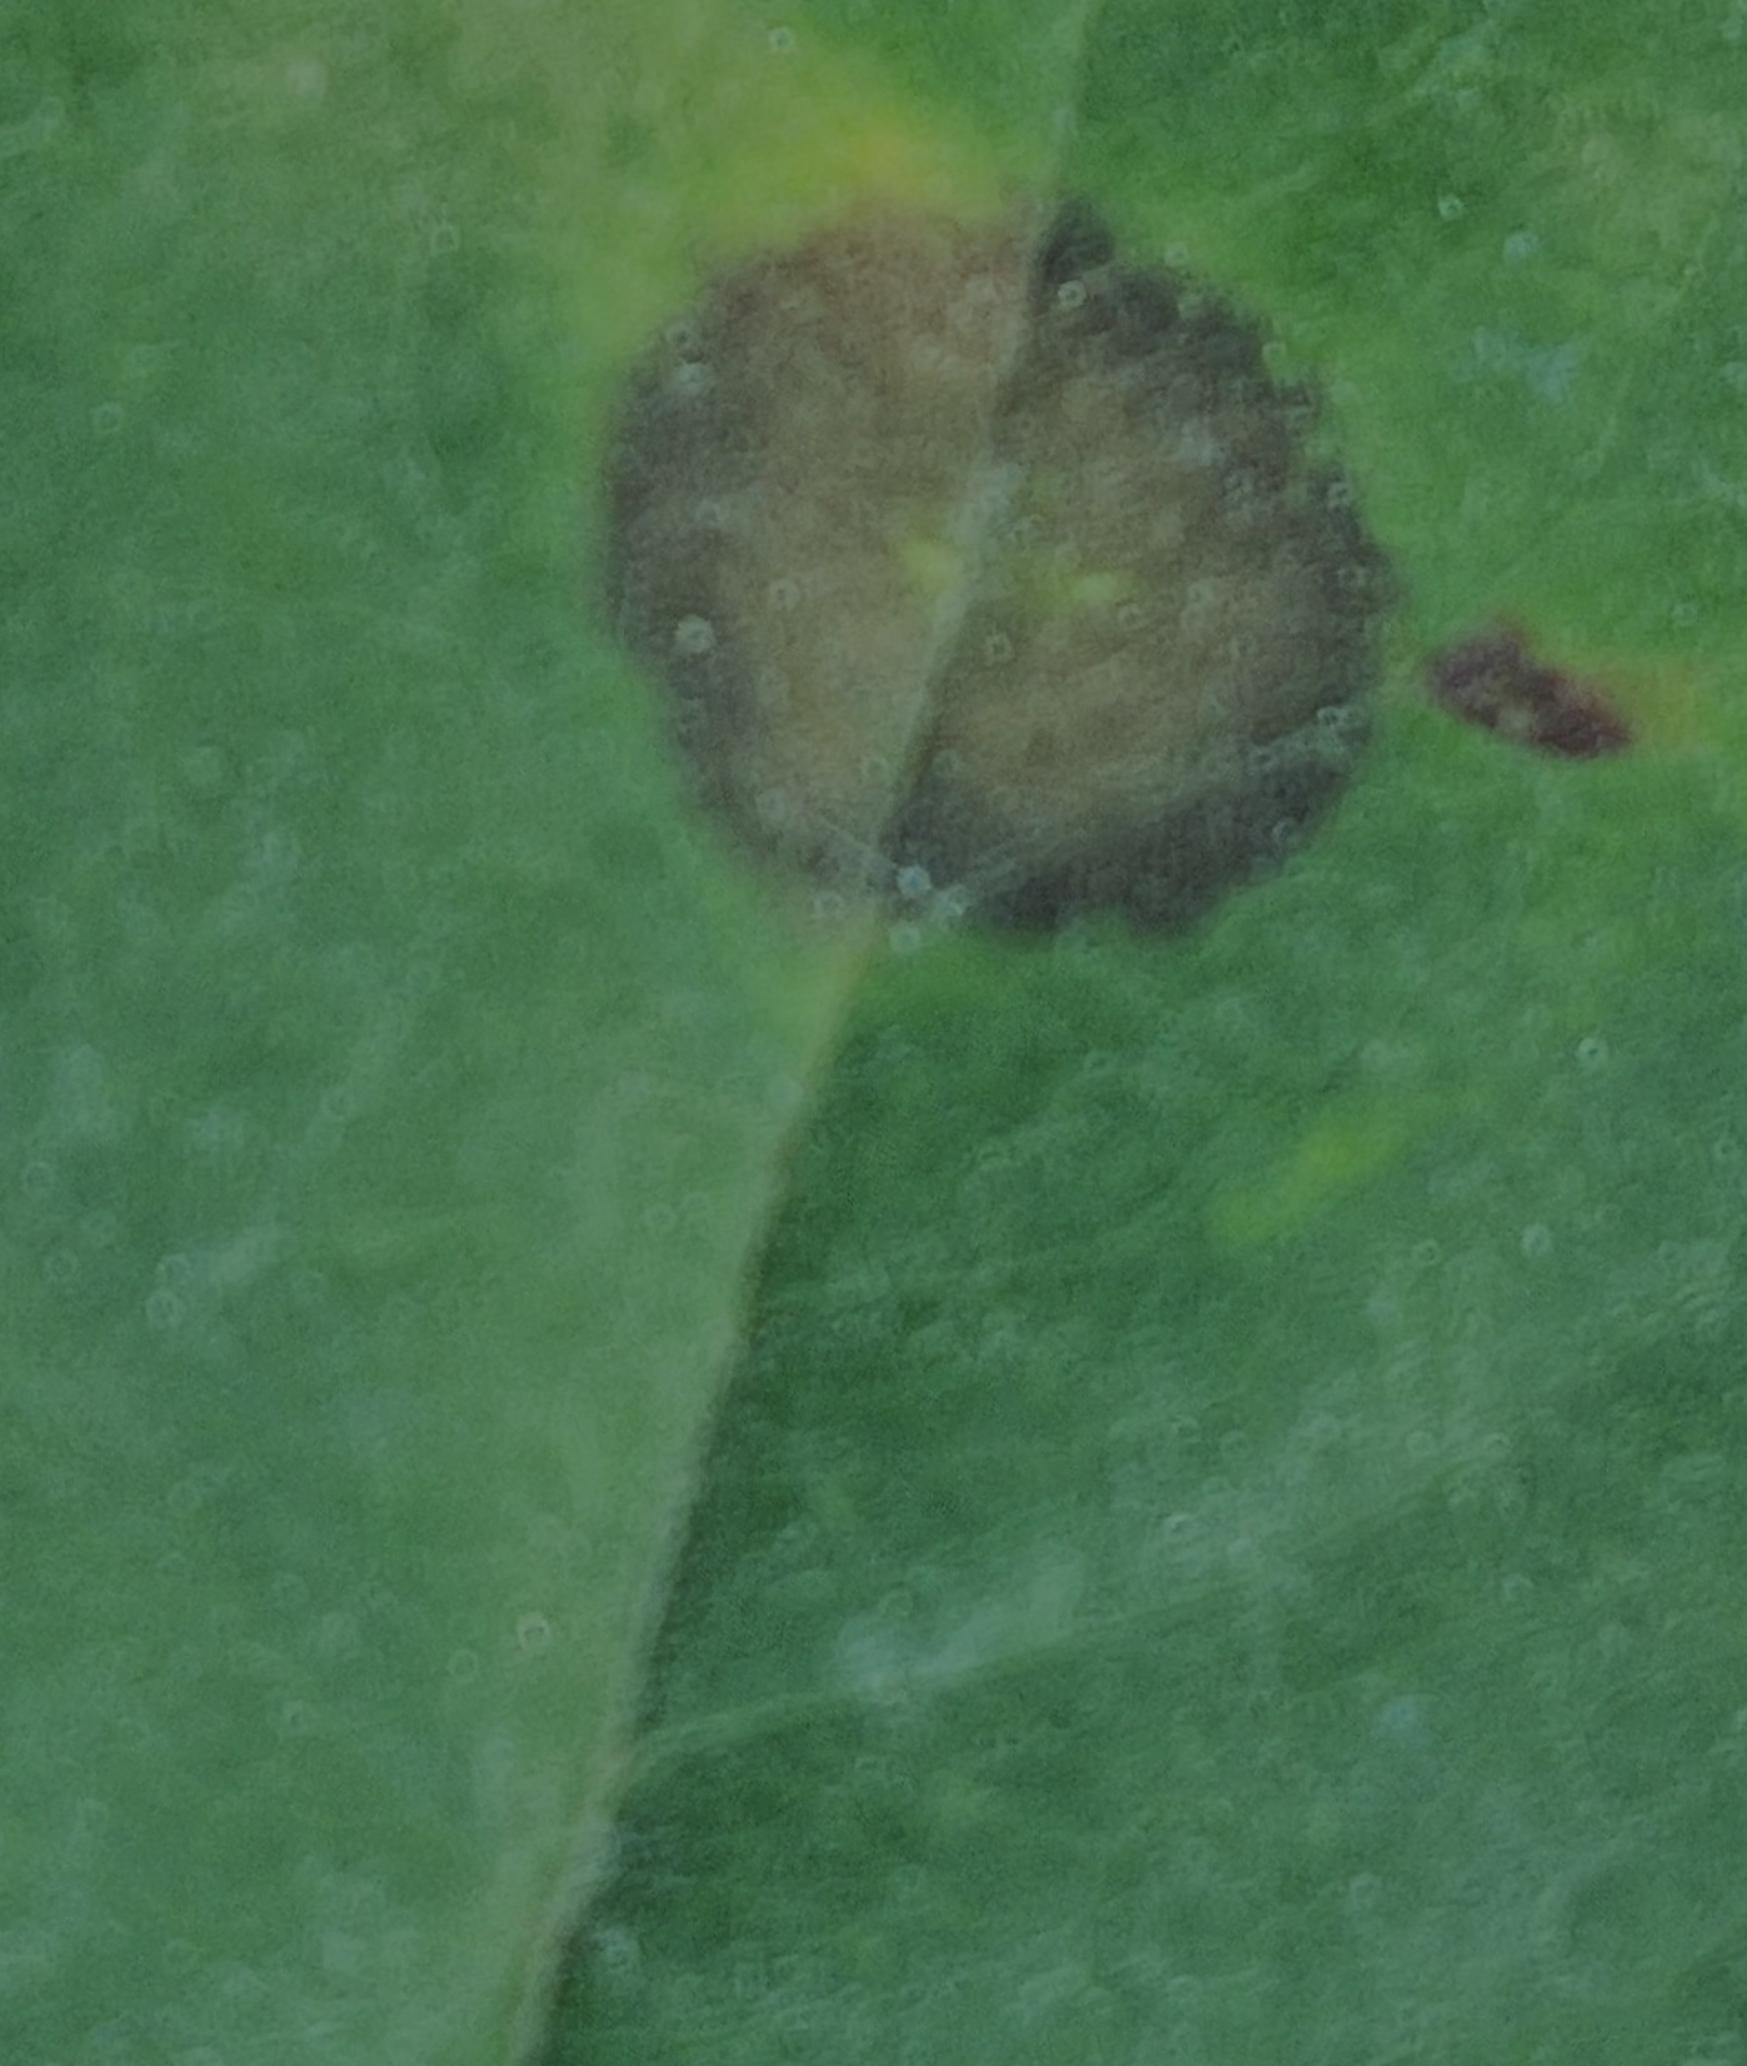

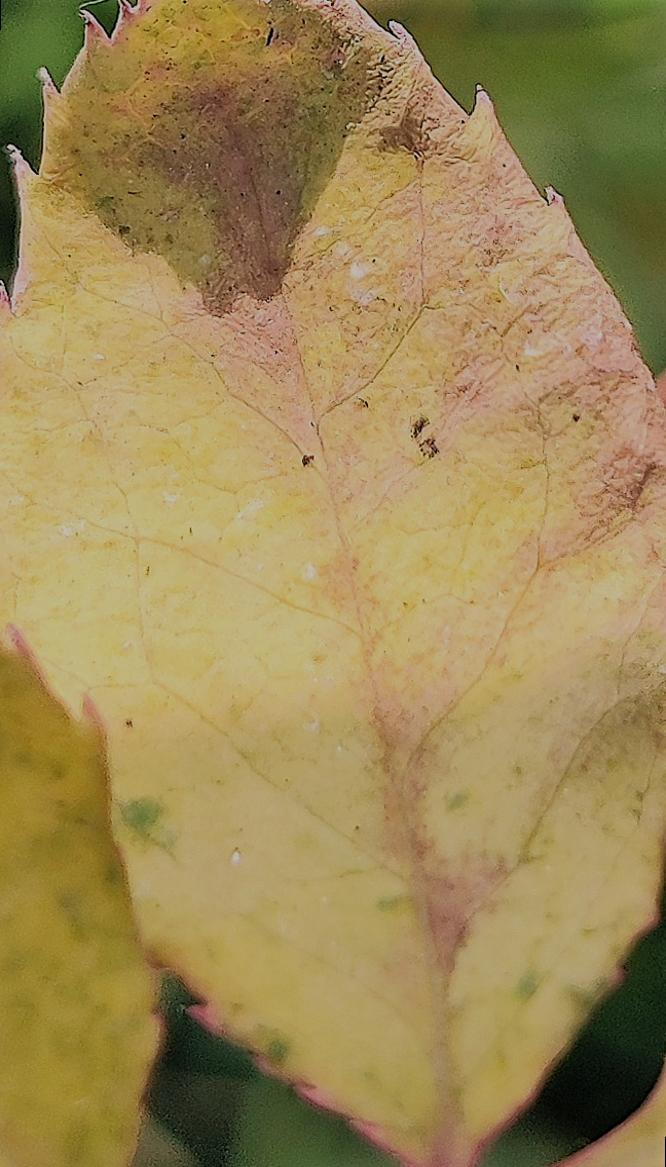

In [2]:
from PIL import Image
import IPython.display as display
import os

# Function to display an image
def display_image(class_name, image_index):
    # Construct the image path
    image_path = os.path.join('D:\\COLLEGE SYLLABUS\\TY\\Project 1\\OG Dataset\\train', class_name, f'{class_name}_{image_index}.jpg')
    
    # Check if the image exists
    if os.path.exists(image_path):
        with open(image_path, 'rb') as f:
            display.display(display.Image(data=f.read(), width=500))
    else:
        print(f"Image {class_name}_{image_index}.jpg does not exist in the path.")

# Example usage
display_image('BLACK_SPOT', 1)  # Display image named BLACK_SPOT_1.jpg
display_image('DOWNY_MILDEW', 2)  # Display image named DOWNY_MILDEW_2.jpg


In [3]:
# Import necessary libraries
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


In [4]:
# dataset paths
train_dir = 'D:/COLLEGE SYLLABUS/TY/Project 1/OG Dataset/train'
validation_dir = 'D:/COLLEGE SYLLABUS/TY/Project 1/OG Dataset/validation'



In [5]:
disease_dict = {
    0: 'BLACK_SPOT',
    1: 'DOWNY_MILDEW',
    2: 'FRESH_LEAF',
    3: 'POWDERY_MILDEW',
    4: 'ROSE_MOSAIC',
    5: 'ROSE_RUST',
    6: 'ROSE_SLUG'
}
num_classes = len(disease_dict)


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [5]:
batch_size = 16

# Create data generators for training and validation sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resizing the images
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),  # Resizing the images
    batch_size=batch_size,
    class_mode='categorical'
)


Found 4900 images belonging to 7 classes.
Found 1050 images belonging to 7 classes.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Building an improved custom CNN model
model = Sequential()

# First convolutional block
model.add(Conv2D(16, (3, 3), input_shape=(224, 224, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional block (to add more depth)
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a GlobalAveragePooling2D layer instead of Flatten to reduce parameters
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(7, activation='softmax'))

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


c:\Users\susha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Callbacks for early stopping, model checkpoint, and learning rate scheduler
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint('lest_model_resnet.keras', monitor='val_loss', save_best_only=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=30,  # Number of epochs
    callbacks=[early_stop, model_checkpoint, lr_scheduler],
    # Increase the number of workers for loading data
    
)

Epoch 1/30


c:\Users\susha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.7471 - loss: 0.6869
Epoch 1: val_loss improved from inf to 0.56273, saving model to lest_model_resnet.keras
306/306 ━━━━━━━━━━━━━━━━━━━━ 153s 492ms/step - accuracy: 0.7471 - loss: 0.6868 - val_accuracy: 0.7846 - val_loss: 0.5627 - learning_rate: 1.0000e-04
Epoch 2/30
  1/306 ━━━━━━━━━━━━━━━━━━━━ 1:37 319ms/step - accuracy: 1.0000 - loss: 0.1617
Epoch 2: val_loss did not improve from 0.56273
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 1.0000 - loss: 0.1617 - val_accuracy: 0.8000 - val_loss: 0.6139 - learning_rate: 1.0000e-04
Epoch 3/30


c:\Users\susha\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 606ms/step - accuracy: 0.7893 - loss: 0.5639
Epoch 3: val_loss improved from 0.56273 to 0.36203, saving model to lest_model_resnet.keras
306/306 ━━━━━━━━━━━━━━━━━━━━ 209s 682ms/step - accuracy: 0.7894 - loss: 0.5638 - val_accuracy: 0.8519 - val_loss: 0.3620 - learning_rate: 1.0000e-04
Epoch 4/30
  1/306 ━━━━━━━━━━━━━━━━━━━━ 5:43 1s/step - accuracy: 0.8125 - loss: 0.3766
Epoch 4: val_loss improved from 0.36203 to 0.15277, saving model to lest_model_resnet.keras
306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8125 - loss: 0.3766 - val_accuracy: 0.9000 - val_loss: 0.1528 - learning_rate: 1.0000e-04
Epoch 5/30
306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 923ms/step - accuracy: 0.8225 - loss: 0.4694
Epoch 5: val_loss did not improve from 0.15277
306/306 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.8225 - loss: 0.4695 - val_accuracy: 0.8894 - val_loss: 0.2682 - learning_rate: 1.0000e-04
Epoch 6/30
  1/306 ━━━━━━━━━━━━━━━━━━━━ 5:28 1s/step - accuracy: 0.9375 - los

In [11]:

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam

# # Define the input shape (224x224 RGB images in this example)
# input_shape = (224, 224, 3)

# # Define the model
# model = Sequential()

# # Add convolutional layers, max pooling, and fully connected layers
# model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D((2, 2)))

# # Flatten the output from the convolutional layers
# model.add(Flatten())

# # Fully connected (dense) layers
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

# # Output layer (adjust the number of classes)
# model.add(Dense(7, activation='softmax'))  # Assuming 7 classes for classification

# # Compile the model
# model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])



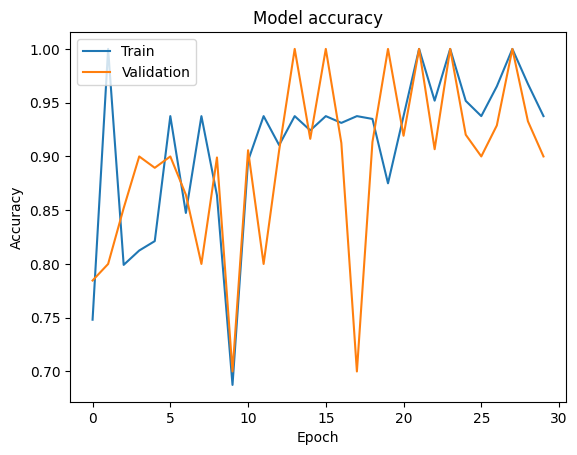

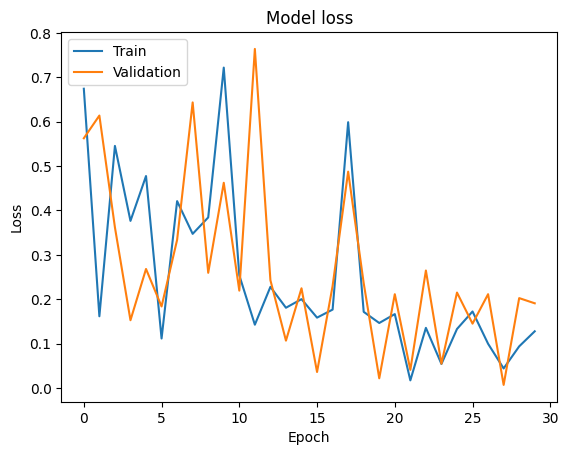

In [16]:
import matplotlib.pyplot as plt 

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [17]:
 # Save the trained model
model.save('themodel.keras')


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  

test_datagen = ImageDataGenerator(rescale=1./255)

# Define test generator
test_generator = test_datagen.flow_from_directory(
    'D:/COLLEGE SYLLABUS/TY/Project 1/OG Dataset/test', 
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical',  
    shuffle=False  
)



Found 1050 images belonging to 7 classes.


c:\Users\susha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 264ms/step


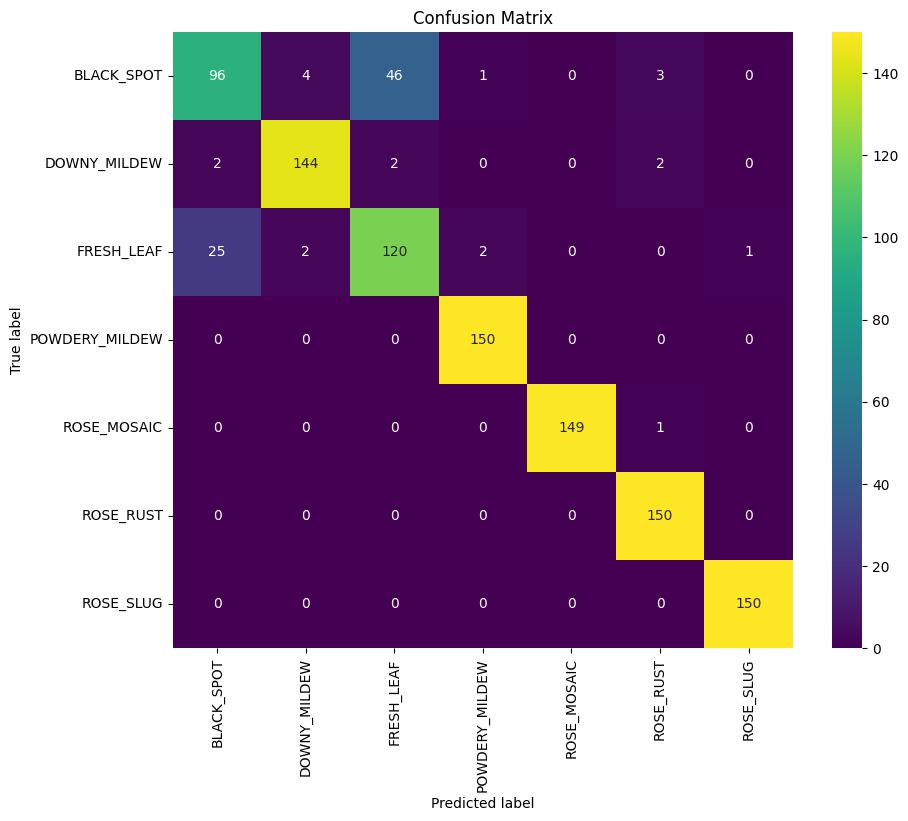

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes


cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from tensorflow.keras.models import load_model  

model = load_model('themodel.keras')

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 228ms/step - accuracy: 0.8197 - loss: 0.4300
Test Loss: 0.22011762857437134, Test Accuracy: 0.9133333563804626


In [57]:

import numpy as np
from keras.preprocessing import image

def load_and_preprocess_image(img_path):
 
    img = image.load_img(img_path, target_size=(225, 225)) 
 
    img_array = image.img_to_array(img)
  
    img_array = img_array / 255.0
    
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


In [7]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Load your models
cnn_model = tf.keras.models.load_model('cnn_rose_disease_model.h5')
incpv3_model = tf.keras.models.load_model('incpv3model.keras')
layer4_model = tf.keras.models.load_model('layer4_model.keras')
the_model = tf.keras.models.load_model('themodel.keras')

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  

test_datagen = ImageDataGenerator(rescale=1./255)

# Define test generator
test_generator = test_datagen.flow_from_directory(
    'D:/COLLEGE SYLLABUS/TY/Project 1/OG Dataset/test', 
    target_size=(224, 224),  
    batch_size=32,
    class_mode='categorical',  
    shuffle=False  
)



Found 1050 images belonging to 7 classes.


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name, class_labels):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 219ms/step
Accuracy of CNN model: 0.9038095238095238


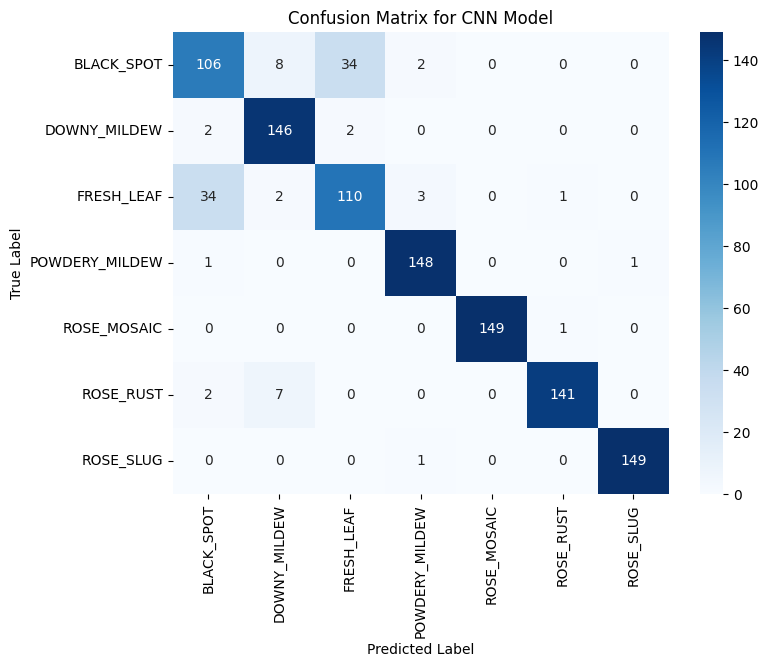

In [13]:
# Predict on the test set using the model
y_pred = cnn_model.predict(test_generator, verbose=1)

# Convert predictions to class indices
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from the generator
y_true = test_generator.classes

# Optionally, get class labels from the generator
class_labels = list(test_generator.class_indices.keys())

# Calculate accuracy
accuracy_cnn = accuracy_score(y_true, y_pred_classes)

# Generate confusion matrix
cm_cnn = confusion_matrix(y_true, y_pred_classes)

# Print classification report
report_cnn = classification_report(y_true, y_pred_classes, target_names=class_labels)

# Print accuracy
print(f"Accuracy of CNN model: {accuracy_cnn}")

# Plot confusion matrix
plot_confusion_matrix(cm_cnn, 'CNN Model', class_labels)

In [16]:
# Print classification report
report_cnn = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(f"Accuracy of CNN model: {accuracy_cnn}")
print(report_cnn)


Accuracy of CNN model: 0.9038095238095238
                precision    recall  f1-score   support

    BLACK_SPOT       0.73      0.71      0.72       150
  DOWNY_MILDEW       0.90      0.97      0.93       150
    FRESH_LEAF       0.75      0.73      0.74       150
POWDERY_MILDEW       0.96      0.99      0.97       150
   ROSE_MOSAIC       1.00      0.99      1.00       150
     ROSE_RUST       0.99      0.94      0.96       150
     ROSE_SLUG       0.99      0.99      0.99       150

      accuracy                           0.90      1050
     macro avg       0.90      0.90      0.90      1050
  weighted avg       0.90      0.90      0.90      1050



33/33 ━━━━━━━━━━━━━━━━━━━━ 27s 777ms/step
Accuracy of InceptionV3 model: 0.9304761904761905
                precision    recall  f1-score   support

    BLACK_SPOT       0.80      0.83      0.81       150
  DOWNY_MILDEW       0.90      0.92      0.91       150
    FRESH_LEAF       0.86      0.85      0.86       150
POWDERY_MILDEW       0.97      0.97      0.97       150
   ROSE_MOSAIC       0.99      1.00      0.99       150
     ROSE_RUST       1.00      0.95      0.97       150
     ROSE_SLUG       1.00      0.99      1.00       150

      accuracy                           0.93      1050
     macro avg       0.93      0.93      0.93      1050
  weighted avg       0.93      0.93      0.93      1050



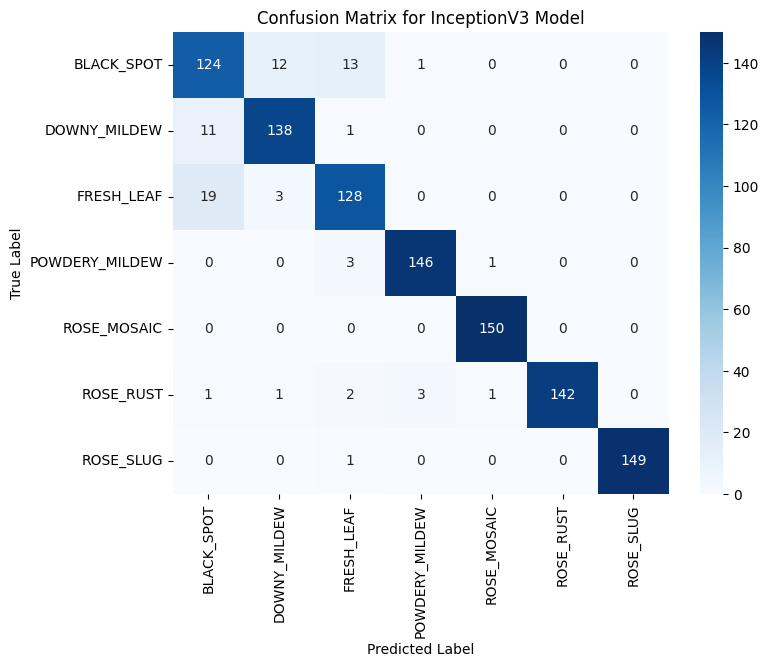

In [17]:
incpv3_model = tf.keras.models.load_model('incpv3model.keras')
y_pred_incpv3 = incpv3_model.predict(test_generator, verbose=1)
y_pred_classes_incpv3 = np.argmax(y_pred_incpv3, axis=1)

# Calculate accuracy
accuracy_incpv3 = accuracy_score(y_true, y_pred_classes_incpv3)

# Generate confusion matrix
cm_incpv3 = confusion_matrix(y_true, y_pred_classes_incpv3)

# Print classification report
report_incpv3 = classification_report(y_true, y_pred_classes_incpv3, target_names=class_labels)
print(f"Accuracy of InceptionV3 model: {accuracy_incpv3}")
print(report_incpv3)

# Plot confusion matrix
plot_confusion_matrix(cm_incpv3, 'InceptionV3 Model', class_labels)

33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step
Accuracy of Layer4 model: 0.9133333333333333
                precision    recall  f1-score   support

    BLACK_SPOT       0.78      0.64      0.70       150
  DOWNY_MILDEW       0.96      0.96      0.96       150
    FRESH_LEAF       0.71      0.80      0.75       150
POWDERY_MILDEW       0.98      1.00      0.99       150
   ROSE_MOSAIC       1.00      0.99      1.00       150
     ROSE_RUST       0.96      1.00      0.98       150
     ROSE_SLUG       0.99      1.00      1.00       150

      accuracy                           0.91      1050
     macro avg       0.91      0.91      0.91      1050
  weighted avg       0.91      0.91      0.91      1050



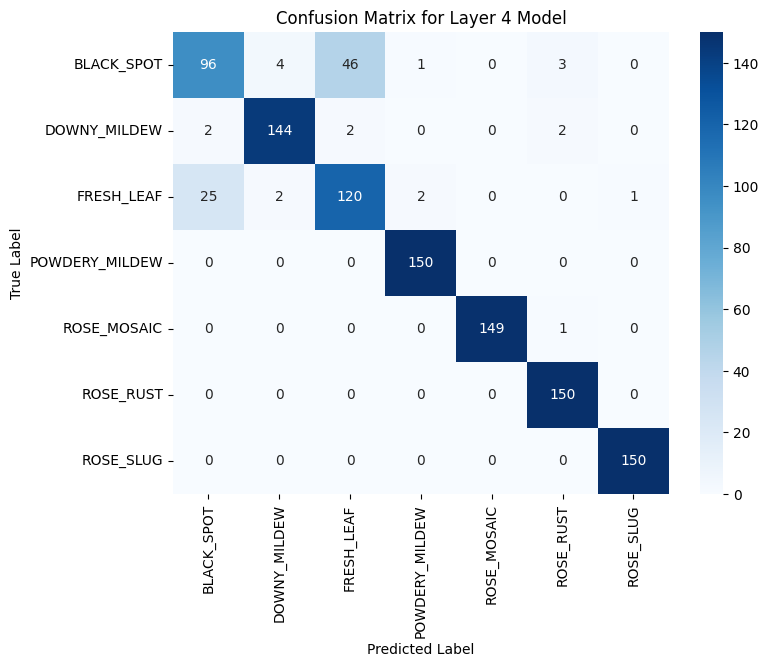

In [18]:
### Model 3: Layer 4 Model
layer4_model = tf.keras.models.load_model('layer4_model.keras')
y_pred_layer4 = layer4_model.predict(test_generator, verbose=1)
y_pred_classes_layer4 = np.argmax(y_pred_layer4, axis=1)

# Calculate accuracy
accuracy_layer4 = accuracy_score(y_true, y_pred_classes_layer4)

# Generate confusion matrix
cm_layer4 = confusion_matrix(y_true, y_pred_classes_layer4)

# Print classification report
report_layer4 = classification_report(y_true, y_pred_classes_layer4, target_names=class_labels)
print(f"Accuracy of Layer4 model: {accuracy_layer4}")
print(report_layer4)

# Plot confusion matrix
plot_confusion_matrix(cm_layer4, 'Layer 4 Model', class_labels)

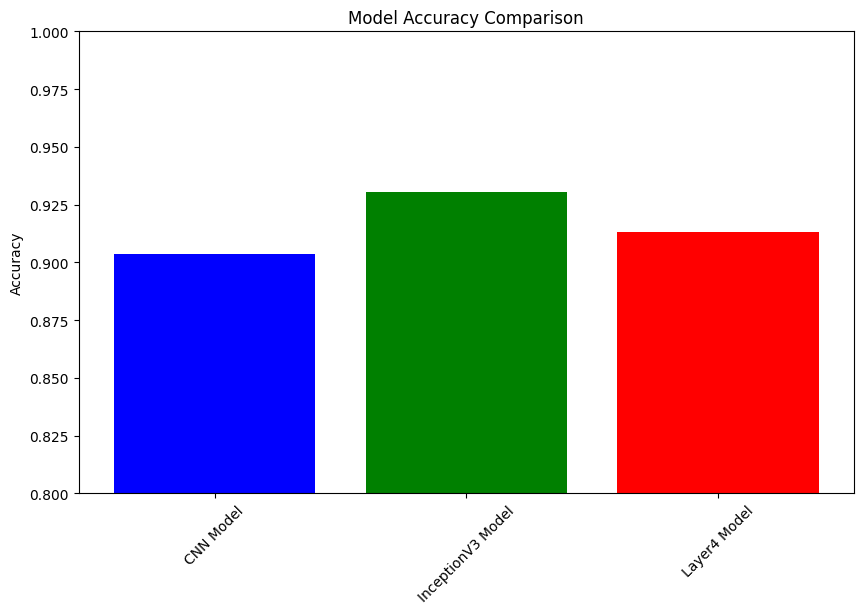

In [24]:
import matplotlib.pyplot as plt

# Store accuracies of all models in a dictionary
model_accuracies = {
    "CNN Model": accuracy_cnn,
    "InceptionV3 Model": accuracy_incpv3,
    "Layer4 Model": accuracy_layer4,
   
}

# Plot the accuracies
plt.figure(figsize=(10,6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)  # Accuracy is between 0 and 1
plt.xticks(rotation=45)
plt.show()


In [23]:
from tensorflow.keras.utils import plot_model

# Define paths to save the architecture diagrams
cnn_model_arch_path = 'cnn_model_architecture.png'
incpv3_model_arch_path = 'incpv3_model_architecture.png'
layer4_model_arch_path = 'layer4_model_architecture.png'
the_model_arch_path = 'the_model_architecture.png'

# Generate and save the architecture diagram for each model

# CNN Model
plot_model(cnn_model, to_file=cnn_model_arch_path, show_shapes=True, show_layer_names=True)
print(f"CNN Model architecture diagram saved to {cnn_model_arch_path}")

# InceptionV3 Model
plot_model(incpv3_model, to_file=incpv3_model_arch_path, show_shapes=True, show_layer_names=True)
print(f"InceptionV3 Model architecture diagram saved to {incpv3_model_arch_path}")

# Layer4 Model
plot_model(layer4_model, to_file=layer4_model_arch_path, show_shapes=True, show_layer_names=True)
print(f"Layer4 Model architecture diagram saved to {layer4_model_arch_path}")

# The Model
plot_model(the_model, to_file=the_model_arch_path, show_shapes=True, show_layer_names=True)
print(f"The Model architecture diagram saved to {the_model_arch_path}")


CNN Model architecture diagram saved to cnn_model_architecture.png
InceptionV3 Model architecture diagram saved to incpv3_model_architecture.png
Layer4 Model architecture diagram saved to layer4_model_architecture.png
The Model architecture diagram saved to the_model_architecture.png
